In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib.pyplot import plot


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [5]:
%cd /gdrive/My\ Drive/Data

/gdrive/My Drive/Data


In [0]:
vehicle_df = pd.read_csv('vehicle.csv')

In [7]:
vehicle_df.shape

(846, 19)

In [8]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [9]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [10]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [0]:
cir_mean = np.mean(vehicle_df['circularity'])
# Circularity is normally distributed, so we can utilize mean value for missing values.
vehicle_df.loc[vehicle_df['circularity'].isna() == True, 'circularity'] = cir_mean

In [0]:
dis_cir_mean = np.mean(vehicle_df['distance_circularity'])
vehicle_df.loc[vehicle_df['distance_circularity'].isna() == True, 'distance_circularity'] = dis_cir_mean

In [0]:
radius_ratio = vehicle_df.loc[vehicle_df['radius_ratio'].isna() == False, 'radius_ratio']
radius_ratio_median = np.median(radius_ratio)
# radius_ratio_median = np.median(vehicle_df['radius_ratio'])
radius_ratio_median
# radius ratio has a long tail, so we can utilize median value for missing values.
vehicle_df.loc[vehicle_df['radius_ratio'].isna() == True, 'radius_ratio'] = radius_ratio_median

In [0]:
axis_aspect_ratio = vehicle_df.loc[vehicle_df['pr.axis_aspect_ratio'].isna() == False, 'pr.axis_aspect_ratio']
axis_aspect_ratio = np.median(axis_aspect_ratio)
# axis aspect ratio has a long tail, so we can utilize median value for missing values.
vehicle_df.loc[vehicle_df['pr.axis_aspect_ratio'].isna() == True, 'pr.axis_aspect_ratio'] = axis_aspect_ratio

In [0]:
scatter_ratio = vehicle_df.loc[vehicle_df['scatter_ratio'].isna() == False, 'scatter_ratio']
scatter_ratio = np.mean(scatter_ratio)
# scatter ratio has a normal distribution, so we can utilize mean value for missing values.
vehicle_df.loc[vehicle_df['scatter_ratio'].isna() == True, 'scatter_ratio'] = scatter_ratio

In [0]:
elongatedness_mean = np.mean(vehicle_df['elongatedness'])
vehicle_df.loc[vehicle_df['elongatedness'].isna() == True, 'elongatedness'] = elongatedness_mean

In [0]:
axis_rectangularity = vehicle_df.loc[vehicle_df['pr.axis_rectangularity'].isna() == False, 'pr.axis_rectangularity']
axis_rectangularity = np.median(axis_rectangularity)

vehicle_df.loc[vehicle_df['pr.axis_rectangularity'].isna() == True, 'pr.axis_rectangularity'] = axis_rectangularity

In [0]:
# np.mean(vehicle_df['scaled_variance'])
scaled_variance = vehicle_df.loc[vehicle_df['scaled_variance'].isna() == False, 'scaled_variance']
scaled_variance = np.median(scaled_variance)

vehicle_df.loc[vehicle_df['scaled_variance'].isna() == True, 'scaled_variance'] = scaled_variance

In [0]:

scaled_variance = vehicle_df.loc[vehicle_df['scaled_variance.1'].isna() == False, 'scaled_variance.1']
scaled_variance = np.median(scaled_variance)

vehicle_df.loc[vehicle_df['scaled_variance.1'].isna() == True, 'scaled_variance.1'] = scaled_variance

In [0]:
# np.mean(vehicle_df['scaled_radius_of_gyration'])
scaled_radius_of_gyration = vehicle_df.loc[vehicle_df['scaled_radius_of_gyration'].isna() == False, 'scaled_radius_of_gyration']
scaled_radius_of_gyration = np.median(scaled_radius_of_gyration)

vehicle_df.loc[vehicle_df['scaled_radius_of_gyration'].isna() == True, 'scaled_radius_of_gyration'] = scaled_radius_of_gyration

In [0]:
# np.mean(vehicle_df['scaled_radius_of_gyration.1'])
scaled_radius_of_gyration = vehicle_df.loc[vehicle_df['scaled_radius_of_gyration.1'].isna() == False, 'scaled_radius_of_gyration.1']
scaled_radius_of_gyration = np.median(scaled_radius_of_gyration)
# scaled_radius_of_gyration
vehicle_df.loc[vehicle_df['scaled_radius_of_gyration.1'].isna() == True, 'scaled_radius_of_gyration.1'] = scaled_radius_of_gyration

In [0]:
# np.mean(vehicle_df['skewness_about'])
skewness_about = vehicle_df.loc[vehicle_df['skewness_about'].isna() == False, 'skewness_about']
skewness_about = np.median(skewness_about)
# skewness_about
vehicle_df.loc[vehicle_df['skewness_about'].isna() == True, 'skewness_about'] = skewness_about

In [0]:
# np.mean(vehicle_df['skewness_about.1'])
skewness_about = vehicle_df.loc[vehicle_df['skewness_about.1'].isna() == False, 'skewness_about.1']
skewness_about = np.median(skewness_about)
# skewness_about
vehicle_df.loc[vehicle_df['skewness_about.1'].isna() == True, 'skewness_about.1'] = skewness_about

In [0]:
# np.mean(vehicle_df['skewness_about.2'])
skewness_about = vehicle_df.loc[vehicle_df['skewness_about.2'].isna() == False, 'skewness_about.2']
skewness_about = np.median(skewness_about)
# skewness_about
vehicle_df.loc[vehicle_df['skewness_about.2'].isna() == True, 'skewness_about.2'] = skewness_about

In [25]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
vehicle_df.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


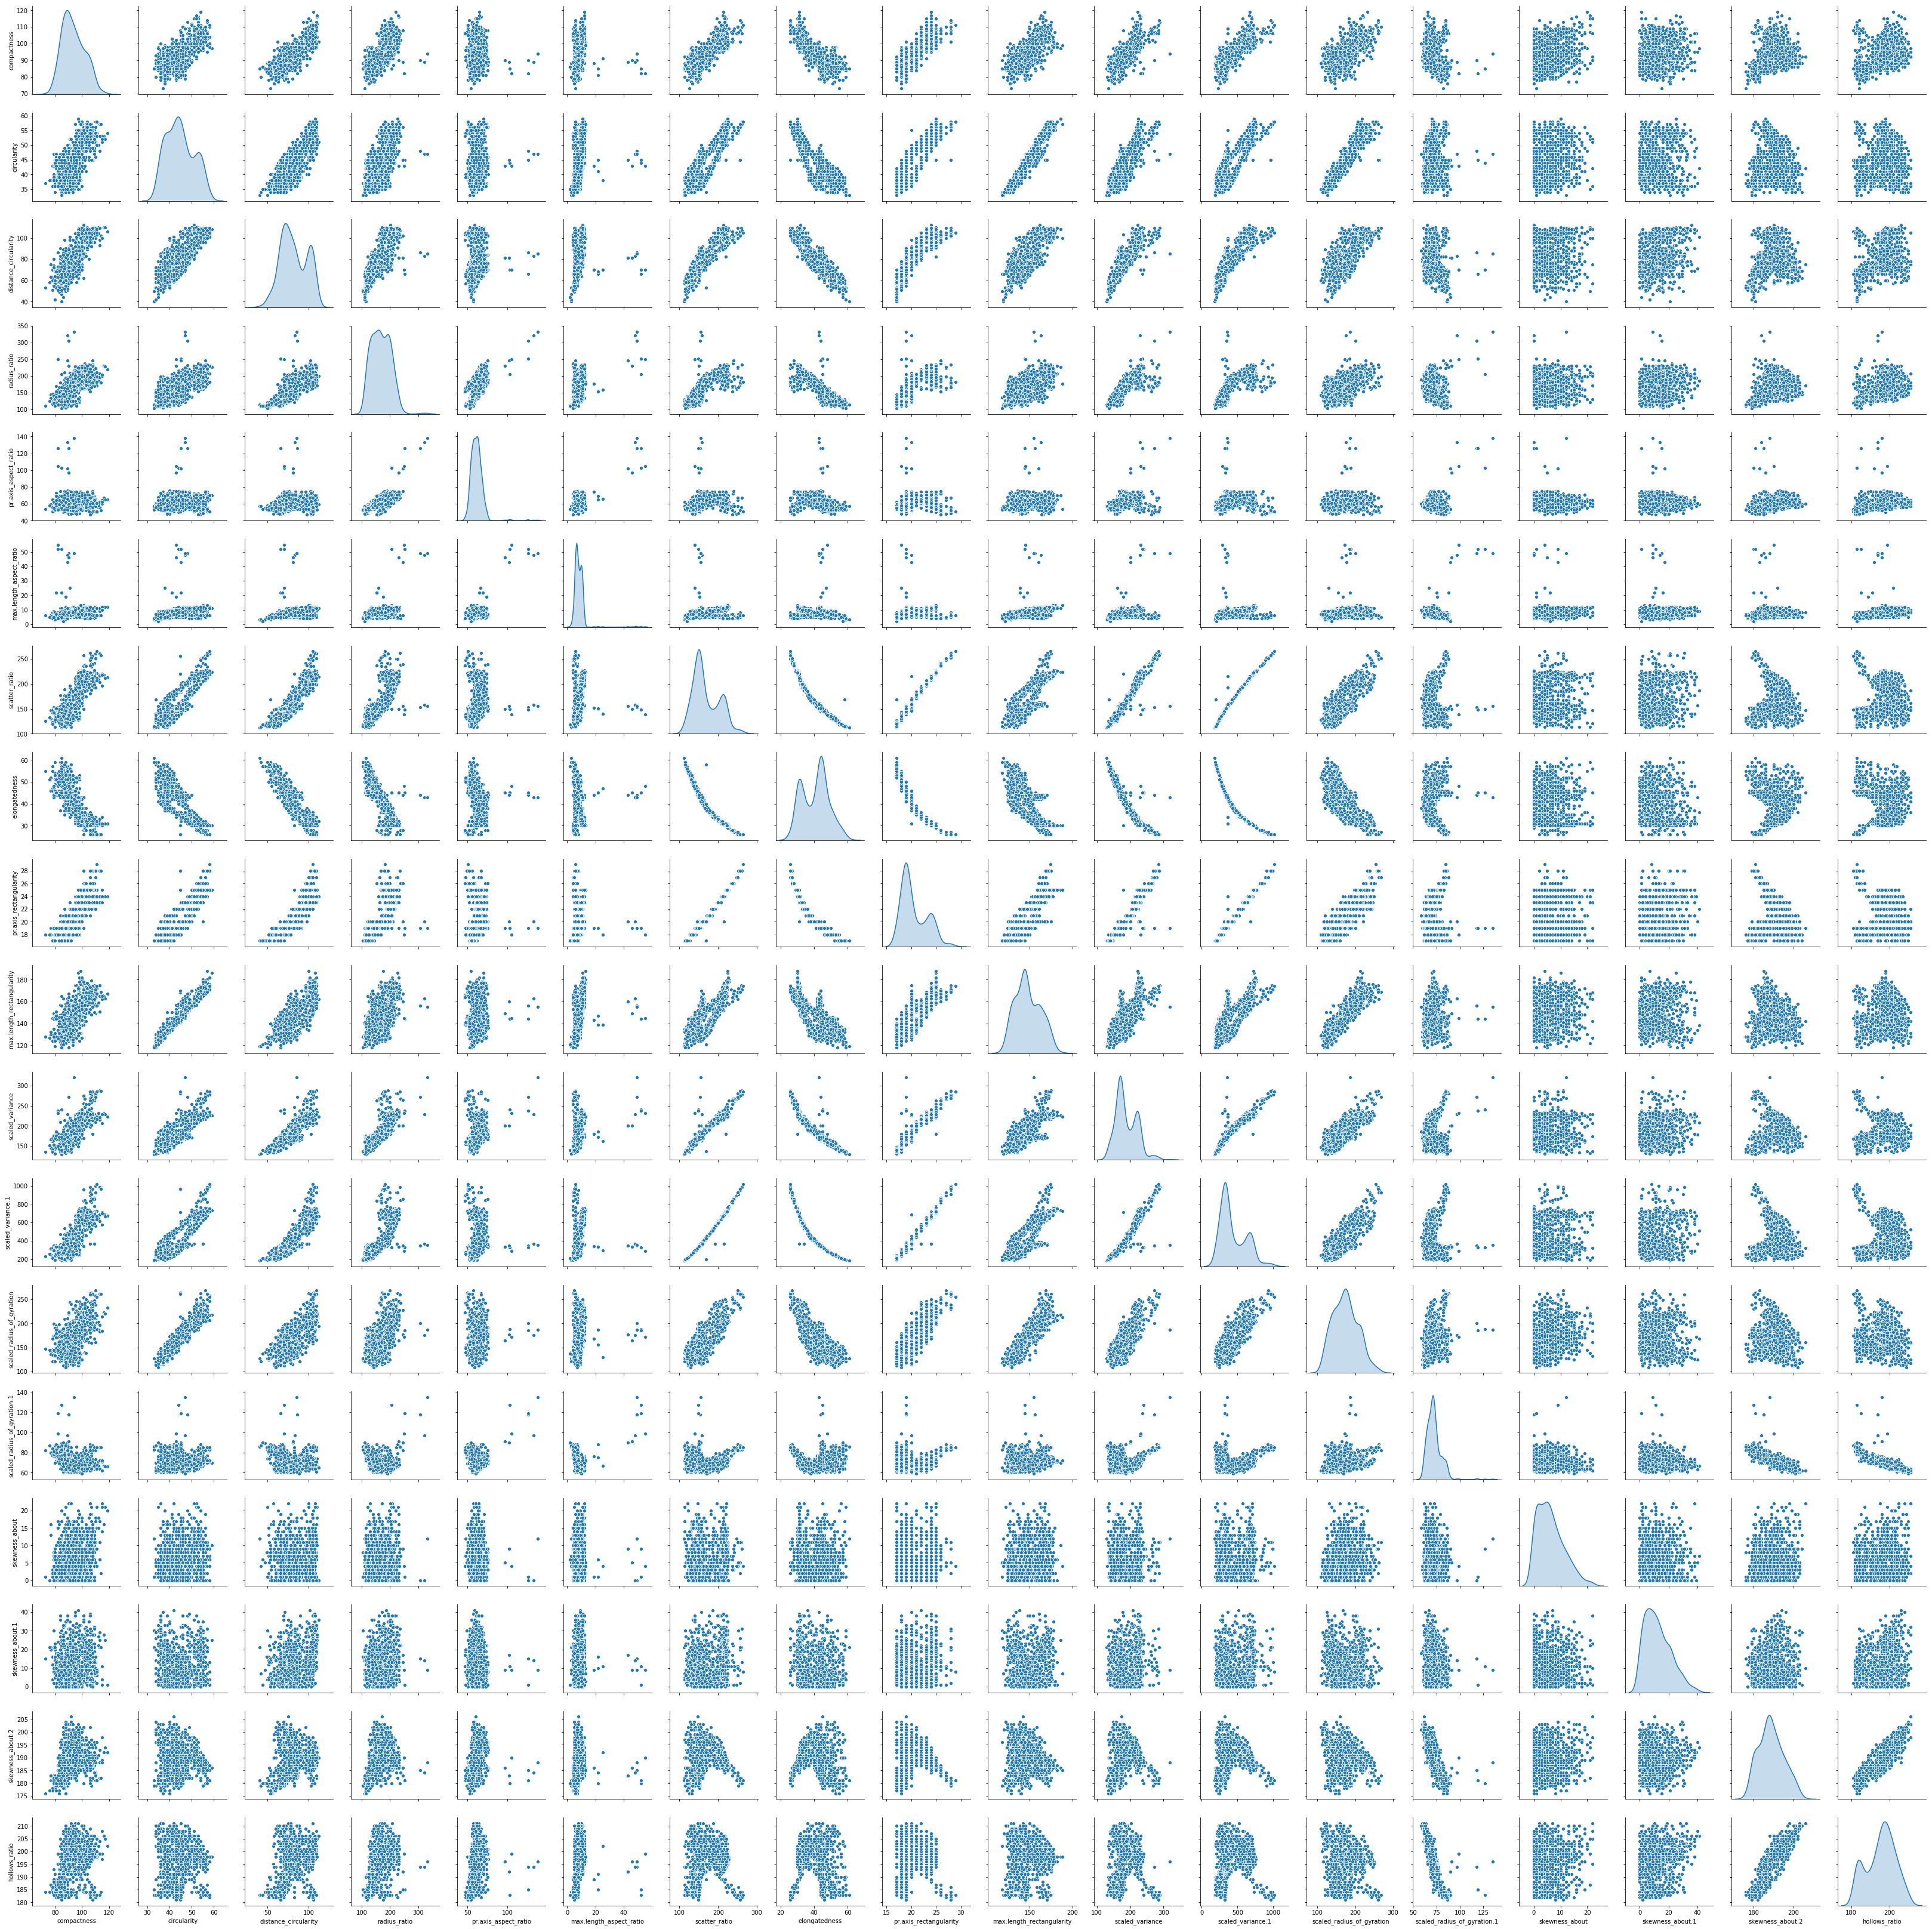

In [0]:
sns.pairplot(vehicle_df, diag_kind="kde")

In [0]:
from scipy.stats import zscore
numeric_df = vehicle_df.drop('class', axis=1)
vehicle_class = vehicle_df.pop('class')

vehicle_df_z = numeric_df.apply(zscore)




In [0]:
vehicle_df_z = vehicle_df_z.join(pd.DataFrame(vehicle_class))

In [28]:
vehicle_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.160580,0.517302,0.056545,0.273363,1.310398,0.311542,-0.208038,0.136580,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957,van
1,-0.325470,-0.624564,0.120112,-0.835032,-0.593753,0.094079,-0.599893,0.520853,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977,van
2,1.254193,0.843549,1.518571,1.202018,0.548738,0.311542,1.148382,-1.144331,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447,car
3,-0.082445,-0.624564,-0.007021,-0.295813,0.167907,0.094079,-0.750606,0.648945,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056,van
4,-1.054545,-0.135193,-0.769817,1.082192,5.245643,9.444962,-0.599893,0.520853,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181,bus


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9985e2630>,
      dtype=object)

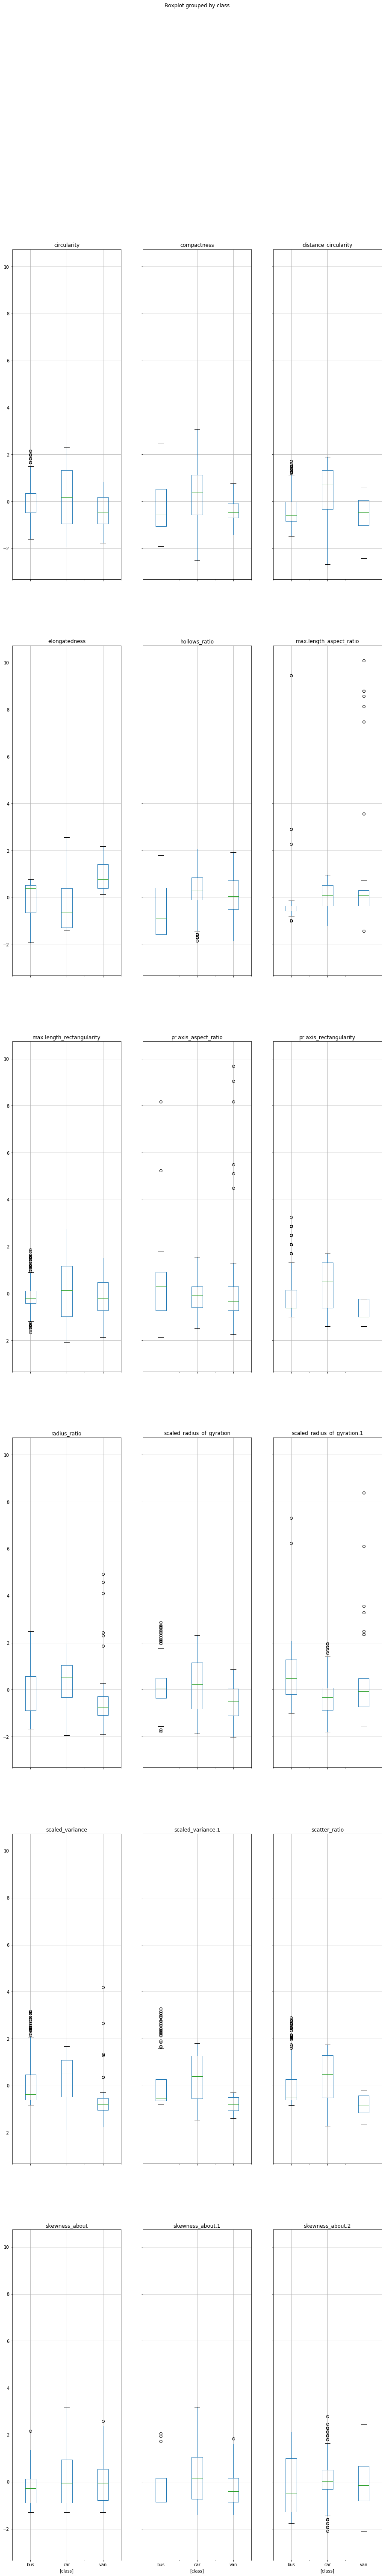

In [0]:
import matplotlib.pylab as plt
vehicle_df_z.boxplot(by = 'class',  layout=(6,3), figsize=(15, 100))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf82ad5518>,
      dtype=object)

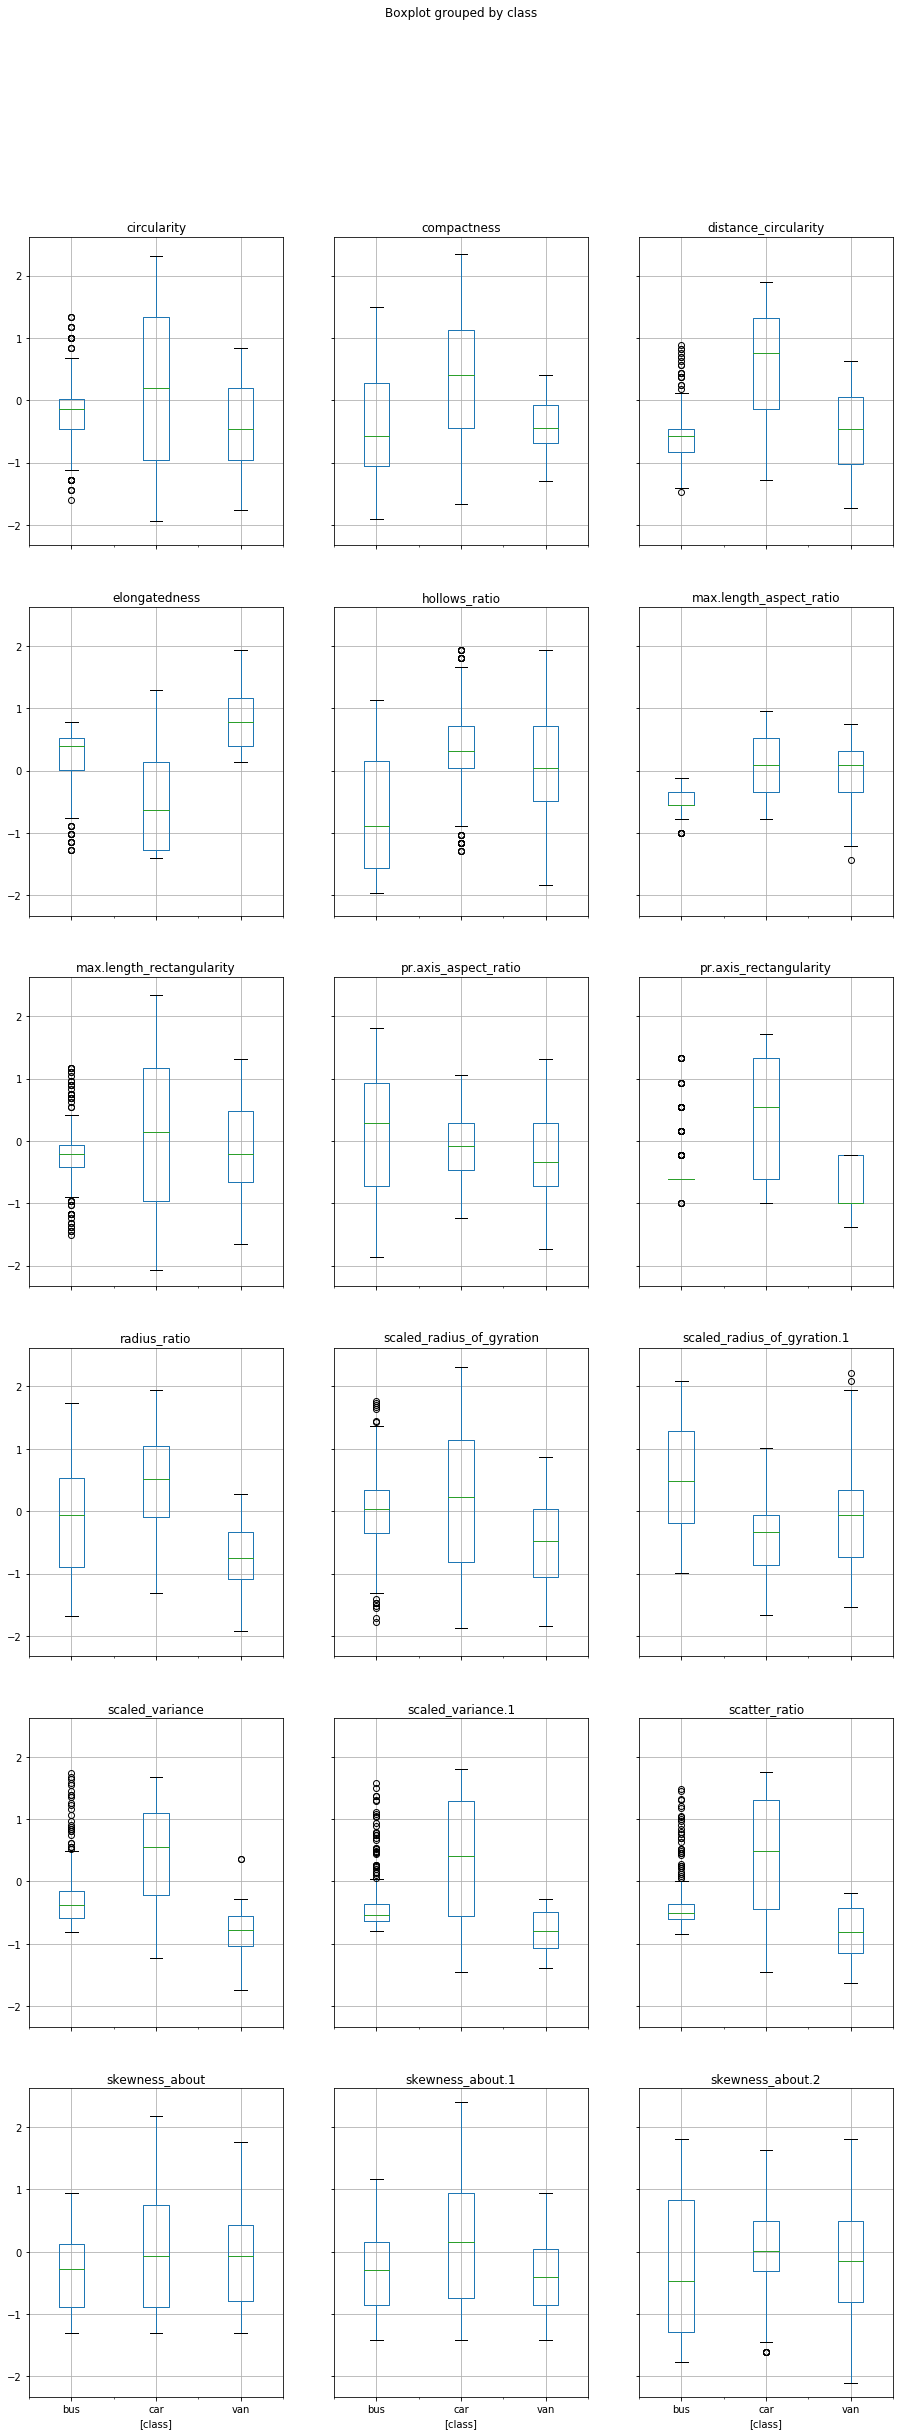

In [170]:
# From the boxplot it is evident that there are outliers for majority of the features.
# We shall try to 

data = vehicle_df_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('class').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(vehicle_df_z['class']))



concat_data.boxplot(by = 'class',  layout=(6,3), figsize=(15, 40))


In [147]:
vehicle_df_z.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689743,0.091534,0.148249,0.812235,-0.788643,0.813694,0.676143,0.762070,0.814012,0.585243,-0.249593,0.236078,0.157015,0.298537,0.365552
circularity,0.685421,1.000000,0.793016,0.620709,0.153089,0.251208,0.848207,-0.821901,0.844440,0.961943,0.797083,0.836984,0.926907,0.053015,0.144505,-0.011851,-0.105331,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.766780,0.158287,0.264550,0.904400,-0.911435,0.893105,0.774669,0.861544,0.886040,0.706000,-0.225439,0.114206,0.265266,0.145674,0.332095
radius_ratio,0.689743,0.620709,0.766780,1.000000,0.663447,0.450052,0.733953,-0.789515,0.708385,0.568949,0.793415,0.718436,0.536372,-0.180397,0.048713,0.173741,0.382214,0.471309
pr.axis_aspect_ratio,0.091534,0.153089,0.158287,0.663447,1.000000,0.648724,0.103542,-0.183055,0.079604,0.126909,0.272910,0.089189,0.121971,0.152950,-0.058371,-0.031976,0.239886,0.267725
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450052,0.648724,1.000000,0.165967,-0.180041,0.161502,0.305943,0.318957,0.143253,0.189743,0.295735,0.015599,0.043422,-0.026081,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.733953,0.103542,0.165967,1.000000,-0.970723,0.989239,0.808356,0.948036,0.992504,0.799313,-0.027683,0.074432,0.212796,0.005358,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789515,-0.183055,-0.180041,-0.970723,1.000000,-0.948965,-0.775519,-0.936474,-0.953765,-0.766079,0.103241,-0.052260,-0.185391,-0.114931,-0.216719
pr.axis_rectangularity,0.813694,0.844440,0.893105,0.708385,0.079604,0.161502,0.989239,-0.948965,1.000000,0.810934,0.934227,0.988213,0.796690,-0.015495,0.083767,0.214700,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961943,0.774669,0.568949,0.126909,0.305943,0.808356,-0.775519,0.810934,1.000000,0.744985,0.794615,0.866450,0.041622,0.135852,0.001366,-0.103948,0.076770


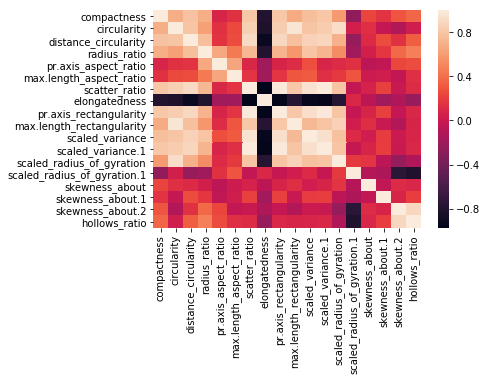

In [81]:
sns.heatmap(vehicle_df_z.corr())

In [0]:
#Elongatedness has a very high correlation with other independent variables (multicollinear)
#Scaled radius of gyration with hollows_ratio , skewness_about.2
#From the pairplot and correlation score, there is a number of variables which are correlated to one another.

In [88]:
vehicle_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.160580,0.517302,0.056545,0.273363,1.310398,0.311542,-0.208038,0.136580,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957,van
1,-0.325470,-0.624564,0.120112,-0.835032,-0.593753,0.094079,-0.599893,0.520853,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977,van
2,1.254193,0.843549,1.518571,1.202018,0.548738,0.311542,1.148382,-1.144331,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447,car
3,-0.082445,-0.624564,-0.007021,-0.295813,0.167907,0.094079,-0.750606,0.648945,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056,van
4,-1.054545,-0.135193,-0.769817,1.082192,5.245643,9.444962,-0.599893,0.520853,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181,bus


In [171]:
dummy = vehicle_df_z.copy()
dummy['Group'] = vehicle_df_z['class']
dummy['pr_axis_aspect_ratio'] = vehicle_df_z['pr.axis_aspect_ratio']
dummy['max_length_aspect_ratio'] = vehicle_df_z['max.length_aspect_ratio']
dummy['pr_axis_rectangularity'] = vehicle_df_z['pr.axis_rectangularity']
dummy['max_length_rectangularity'] = vehicle_df_z['max.length_rectangularity']
dummy['scaled_variance_1'] = vehicle_df_z['scaled_variance.1']
dummy['scaled_radius_of_gyration_1'] = vehicle_df_z['scaled_radius_of_gyration.1']
dummy['skewness_about_1'] = vehicle_df_z['skewness_about.1']
dummy['skewness_about_2'] = vehicle_df_z['skewness_about.2']
dummy.drop(['pr.axis_aspect_ratio','max.length_aspect_ratio','pr.axis_rectangularity','max.length_rectangularity','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about.1','skewness_about.2', 'class'], axis=1)


,compactness,circularity,distance_circularity,radius_ratio,scatter_ratio,elongatedness,scaled_variance,scaled_radius_of_gyration,skewness_about,hollows_ratio,Group,pr_axis_aspect_ratio,max_length_aspect_ratio,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_1,scaled_radius_of_gyration_1,skewness_about_1,skewness_about_2
0,0.160580,0.517302,0.056545,0.273363,-0.208038,0.136580,-0.401920,0.285705,-0.073812,0.183957,van,1.310398,0.311542,-0.224342,0.758332,-0.341934,-0.327326,0.380870,-0.312012
1,-0.325470,-0.624564,0.120112,-0.835032,-0.599893,0.520853,-0.593357,-0.513630,0.538390,0.452977,van,-0.593753,0.094079,-0.610886,-0.344578,-0.619724,-0.059384,0.156798,0.013265
2,1.254193,0.843549,1.518571,1.202018,1.148382,-1.144331,1.097671,1.392477,1.558727,0.049447,car,0.548738,0.311542,0.935290,0.689401,1.109379,0.074587,-0.403383,-0.149374
3,-0.082445,-0.624564,-0.007021,-0.295813,-0.750606,0.648945,-0.912419,-1.466683,-0.073812,1.529056,van,0.167907,0.094079,-0.610886,-0.344578,-0.738777,-1.265121,-0.291347,1.639649
4,-1.054545,-0.135193,-0.769817,1.082192,-0.599893,0.520853,1.671982,0.408680,0.538390,-1.699181,bus,5.245643,9.444962,-0.610886,-0.275646,-0.648070,7.309005,-0.179311,-1.450481
5,1.618730,0.000000,1.518571,0.093623,2.595230,-1.912878,2.916323,2.745198,-0.277879,-1.699181,bus,-1.482357,-0.558308,2.868010,1.447652,2.934859,1.682235,-0.403383,-1.287842
6,0.403605,-0.298317,-0.579118,0.123580,-0.479322,0.136580,-0.401920,-0.083219,1.354659,1.125526,bus,0.421794,-0.558308,-0.610886,-0.344578,-0.443979,-0.863208,-1.299674,1.802287
7,-0.446982,-0.298317,-1.024082,-0.355726,-0.961605,0.905127,-0.848606,-0.329168,-0.686013,0.856507,van,0.421794,0.094079,-0.997430,-0.137782,-0.897515,-0.729238,-1.075601,0.663818
8,-0.933032,-1.766430,-1.278348,-0.864988,-1.413745,1.673674,-1.518636,-1.927838,-0.890081,1.663566,van,-0.085979,-0.340845,-1.383974,-1.447489,-1.226328,-1.131150,0.156798,1.802287
9,-0.082445,-0.135193,1.010040,-0.056160,0.424958,-0.631967,0.427641,-0.698092,-0.481946,1.125526,car,0.040964,0.529004,0.548746,-0.137782,0.372384,-1.131150,0.156798,0.989095


In [172]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(formula,data):
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Var_Name"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    return(vif.round(1))

vif_check =VIF("Group~compactness+circularity+distance_circularity+\
        pr_axis_aspect_ratio+pr_axis_rectangularity+\
        radius_ratio+scatter_ratio+elongatedness+\
        +scaled_variance+scaled_variance_1+\
        scaled_radius_of_gyration+scaled_radius_of_gyration_1+\
        skewness_about+skewness_about_1+skewness_about_2+\
        max_length_aspect_ratio+max_length_rectangularity+hollows_ratio",data = dummy)
vif_check 

,Var_Name,VIF
0,Intercept,1.0
1,compactness,5.4
2,circularity,31.5
3,distance_circularity,13.0
4,pr_axis_aspect_ratio,12.8
5,pr_axis_rectangularity,61.9
6,radius_ratio,30.8
7,scatter_ratio,190.6
8,elongatedness,35.6
9,scaled_variance,36.2


In [173]:
vif_check =VIF("Group~compactness+circularity+distance_circularity+\
        pr_axis_aspect_ratio+pr_axis_rectangularity+\
        radius_ratio+elongatedness+\
        +scaled_variance+scaled_variance_1+\
        scaled_radius_of_gyration+scaled_radius_of_gyration_1+\
        skewness_about+skewness_about_1+skewness_about_2+\
        max_length_aspect_ratio+max_length_rectangularity+hollows_ratio",data = dummy)
vif_check 

,Var_Name,VIF
0,Intercept,1.0
1,compactness,5.4
2,circularity,31.4
3,distance_circularity,13.0
4,pr_axis_aspect_ratio,12.5
5,pr_axis_rectangularity,55.7
6,radius_ratio,30.3
7,elongatedness,21.9
8,scaled_variance,36.1
9,scaled_variance_1,63.5


In [174]:
vif_check =VIF("Group~compactness+\
        pr_axis_aspect_ratio+\
        elongatedness+\
        scaled_radius_of_gyration+scaled_radius_of_gyration_1+\
        skewness_about+skewness_about_1+skewness_about_2+\
        max_length_aspect_ratio+max_length_rectangularity",data = dummy)
vif_check 

,Var_Name,VIF
0,Intercept,1.0
1,compactness,3.8
2,pr_axis_aspect_ratio,2.5
3,elongatedness,5.5
4,scaled_radius_of_gyration,6.6
5,scaled_radius_of_gyration_1,3.5
6,skewness_about,1.2
7,skewness_about_1,1.2
8,skewness_about_2,4.1
9,max_length_aspect_ratio,2.4


In [178]:
#Using Variance Inflation Factor we have removed lot of collinear variables.


dummy_numeric = dummy[['compactness','pr_axis_aspect_ratio','elongatedness','scaled_radius_of_gyration','scaled_radius_of_gyration_1','skewness_about','skewness_about_1','skewness_about_2','max_length_aspect_ratio','max_length_rectangularity']]
# dummy_numeric.head()


,compactness,pr_axis_aspect_ratio,elongatedness,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,max_length_aspect_ratio,max_length_rectangularity
0,0.160580,1.310398,0.136580,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.311542,0.758332
1,-0.325470,-0.593753,0.520853,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.094079,-0.344578
2,1.254193,0.548738,-1.144331,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.311542,0.689401
3,-0.082445,0.167907,0.648945,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,0.094079,-0.344578
4,-1.054545,5.245643,0.520853,0.408680,7.309005,0.538390,-0.179311,-1.450481,9.444962,-0.275646


,num_clusters,cluster_errors
0,1,8460.000000
1,2,6282.014183
2,3,5269.133231
3,4,4064.589142
4,5,3704.527839
5,6,3431.081234
6,7,3214.751093
7,8,3031.508702
8,9,2853.959473


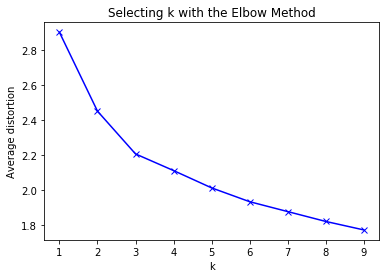

In [179]:
dummy_numeric_z = dummy_numeric.apply(zscore)
from sklearn.cluster import KMeans
distortion = []
from scipy.spatial.distance import cdist
cluster_range = range(1, 10)  
cluster_errors = []
for i in cluster_range:

    clusters = KMeans( n_clusters = i)
    clusters.fit(dummy_numeric_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )

    prediction=clusters.predict(dummy_numeric_z)
    distortion.append(sum(np.min(cdist(dummy_numeric_z, clusters.cluster_centers_, 'euclidean'), axis=1)) / dummy_numeric_z.shape[0])


clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.plot(cluster_range, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,15228.000000
1,2,8993.733330
2,3,7340.717709
3,4,6009.931823
4,5,5438.335386
5,6,4948.306815
6,7,4554.202967
7,8,4296.562959
8,9,4041.616989


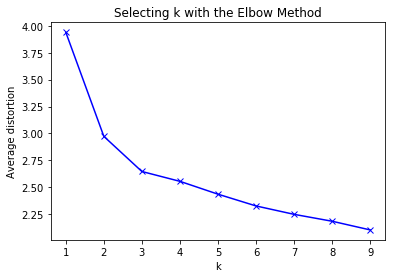

In [33]:
numeric_df_z = numeric_df.apply(zscore)
from sklearn.cluster import KMeans
distortion = []
from scipy.spatial.distance import cdist
cluster_range = range(1, 10)  
cluster_errors = []
for i in cluster_range:

    clusters = KMeans( n_clusters = i)
    clusters.fit(numeric_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )

    prediction=clusters.predict(numeric_df_z)
    distortion.append(sum(np.min(cdist(numeric_df_z, clusters.cluster_centers_, 'euclidean'), axis=1)) / numeric_df_z.shape[0])


clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.plot(cluster_range, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
clusters_df[0:15]


In [0]:
# The cluster error is significantly less incase of VIF applied data. Though the clusters remain the same as expected.

In [80]:
# The elbow method shows that there are 3 clusters which can be identified
clusters = KMeans( n_clusters = 3)
clusters.fit(numeric_df_z)
labels = clusters.labels_
centroids = clusters.cluster_centers_
prediction=clusters.predict(numeric_df_z)
prediction

array([2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 1,
       2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1,

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

In [0]:
X = numeric_df_z
Y = vehicle_class
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)
sc = StandardScaler().fit(Xtrain)
Xtrain = StandardScaler().fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [0]:
pca = PCA(n_components=10)
pca = pca.fit(Xtrain)

In [37]:
pca.explained_variance_ratio_

array([0.52628498, 0.17284323, 0.0905408 , 0.06615152, 0.04991557,
       0.03345371, 0.02217035, 0.01221837, 0.00897233, 0.0048088 ])

In [0]:
# With 7 components we can explain 96% of the variance

In [0]:
pca = PCA(n_components=7)
pca = pca.fit(Xtrain)
X_reduced = pca.fit_transform(Xtrain)
X_test_reduced = pca.transform(Xtest)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

SVM: 0.908731 (0.014833)
SVM linear: 0.782139 (0.023694)
SVM RBF: 0.910426 (0.021234)
SVM Poly: 0.658824 (0.050359)
SVM Sigmoid: 0.434083 (0.034016)


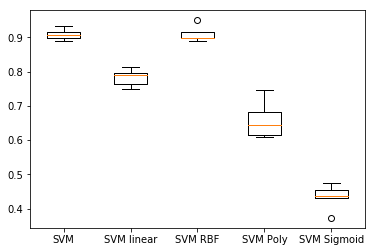

In [52]:
models = []

models.append(('SVM', SVC()))
models.append(('SVM linear', SVC(kernel="linear", C=0.025)))
models.append(('SVM RBF', SVC(gamma="scale", C=1)))
models.append(('SVM Poly', SVC(kernel="poly", C=0.025)))
models.append(('SVM Sigmoid', SVC(kernel="sigmoid", gamma=2)))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=7)
	cv_results = model_selection.cross_val_score(model, X_reduced, ytrain, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'kernel':('linear', 'rbf'), 'C':[ 0.01, 0.05, 0.5, 1]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_reduced, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [0]:
y_pred = clf.predict(X_test_reduced)

In [76]:
import sklearn
sklearn.metrics.confusion_matrix(y_pred, ytest)

array([[ 53,   3,   6],
       [  5, 124,   1],
       [  1,   6,  55]])

In [60]:
clf.score(X_reduced, ytrain)

0.9425675675675675

In [78]:
clf.score(X_test_reduced, ytest)

0.9133858267716536

In [68]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=7)
cv_results = model_selection.cross_val_score(clf, X_reduced, ytrain, cv=kfold, scoring=scoring)

msg = "%s: %f (%f)" % ("svm rbf", cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm rbf: 0.910426 (0.021234)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
# svm rbf : 0.911048 (0.020895) - With a c value of 1, gamma = scaled and  rbf kernel we get 91% f1 score with 2% variance (f1 weighted score). 
# Accuracy score :  0.910426 (0.021234) 91% +/- 2%
# Score - 89%-93% 

In [0]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [0]:
##### Working with VIF reduced dataframe

In [0]:
X = dummy_numeric_z
Y = vehicle_class
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)
sc = StandardScaler().fit(Xtrain)
Xtrain = StandardScaler().fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [0]:
pca = PCA(n_components=10)
pca = pca.fit(Xtrain)

In [183]:
pca.explained_variance_ratio_

array([0.34573548, 0.20344518, 0.14567284, 0.10791691, 0.08834823,
       0.04511236, 0.02935554, 0.01407861, 0.01253027, 0.00780457])

In [0]:
pca = PCA(n_components=7)
pca = pca.fit(Xtrain)
X_reduced = pca.fit_transform(Xtrain)
X_test_reduced = pca.transform(Xtest)

In [185]:
parameters = {'kernel':('linear', 'rbf'), 'C':[ 0.01, 0.05, 0.5, 1]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_reduced, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [186]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [0]:
y_pred = clf.predict(X_test_reduced)

In [189]:
clf.score(X_reduced, ytrain)

0.9222972972972973

In [188]:
clf.score(X_test_reduced, ytest)

0.8779527559055118

In [190]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=5, random_state=7)
cv_results = model_selection.cross_val_score(clf, X_reduced, ytrain, cv=kfold, scoring=scoring)

msg = "%s: %f (%f)" % ("svm rbf", cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svm rbf: 0.895229 (0.015942)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:

# Accuracy score :  0.895229 (0.015942) 89% +/- 1%
# Score - 88%-90%

# This has 89% accuracy with 1% variance. In terms of variance the VIF reduced data does better.
# The bias and variance difference between the two differ by 1.53% and 0.6% . We can take advantage of the better bias difference,
# 